In [0]:
import os
import cv2
import numpy as np
import pandas as pd

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import math

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## EDA

---



In [0]:
# Bradley's Photos
!ls "/content/drive/My Drive/w251 Final Project/Photos"

anno.txt  renamed_AL_1	renamed_BR  renamed_CU_1  renamed_SS_1	renamed_ZN_1


In [0]:
!ls "/content/drive/My Drive/w251 Final Project/Photos/renamed_AL_1" | head -20

AL_0.jpg
AL_100.jpg
AL_101.jpg
AL_102.jpg
AL_103.jpg
AL_104.jpg
AL_105.jpg
AL_106.jpg
AL_107.jpg
AL_108.jpg
AL_109.jpg
AL_10.jpg
AL_110.jpg
AL_111.jpg
AL_112.jpg
AL_113.jpg
AL_114.jpg
AL_115.jpg
AL_116.jpg
AL_117.jpg


In [0]:
BASE_DIR = "/content/drive/My Drive/w251 Final Project/Photos/"
train_folder = BASE_DIR+'renamed_AL_1/'

files_in_train = sorted(os.listdir(train_folder))

images=[i for i in files_in_train]

df = pd.DataFrame()
df['images']=[train_folder+str(x) for x in images]
df['labels']=1

df.to_csv('files_path.csv', header=None)

In [0]:
!cat files_path.csv | head -10

0,/content/drive/My Drive/w251 Final Project/Photos/renamed_AL_1/AL_0.jpg,1
1,/content/drive/My Drive/w251 Final Project/Photos/renamed_AL_1/AL_1.jpg,1
2,/content/drive/My Drive/w251 Final Project/Photos/renamed_AL_1/AL_10.jpg,1
3,/content/drive/My Drive/w251 Final Project/Photos/renamed_AL_1/AL_100.jpg,1
4,/content/drive/My Drive/w251 Final Project/Photos/renamed_AL_1/AL_101.jpg,1
5,/content/drive/My Drive/w251 Final Project/Photos/renamed_AL_1/AL_102.jpg,1
6,/content/drive/My Drive/w251 Final Project/Photos/renamed_AL_1/AL_103.jpg,1
7,/content/drive/My Drive/w251 Final Project/Photos/renamed_AL_1/AL_104.jpg,1
8,/content/drive/My Drive/w251 Final Project/Photos/renamed_AL_1/AL_105.jpg,1
9,/content/drive/My Drive/w251 Final Project/Photos/renamed_AL_1/AL_106.jpg,1


In [0]:
DIR = '/content/drive/My Drive/w251 Final Project/Photos/'
path, dirs, files = next(os.walk(DIR))
print(path)
print(dirs)
print(files)

/content/drive/My Drive/w251 Final Project/Photos/
['renamed_AL_1', 'renamed_SS_1', 'renamed_ZN_1', 'renamed_BR', 'renamed_CU_1']
['anno.txt']


In [0]:
DIR = '/content/drive/My Drive/w251 Final Project/Photos/'
path, dirs, files = os.walk(DIR).__next__()
print(path)
print(dirs)
print(files)

/content/drive/My Drive/w251 Final Project/Photos/
['renamed_AL_1', 'renamed_SS_1', 'renamed_ZN_1', 'renamed_BR', 'renamed_CU_1']
['anno.txt']


In [0]:
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

1


In [0]:
import fnmatch

print(len(fnmatch.filter(os.listdir(DIR + 'renamed_AL_1'), '*.jpg')))

266


In [0]:

file_count = sum(len(files) for _, _, files in os.walk(r'/content/drive/My Drive/w251 Final Project/Photos/'))
print(file_count)

973


In [0]:
set(len(files) for _, _, files in os.walk(r'/content/drive/My Drive/w251 Final Project/Photos/'))

{1, 79, 125, 199, 266, 303}

In [0]:
item = 'renamed_ZN_1'
path = os.path.join('/content/drive/My Drive/w251 Final Project/Photos/', item)
list_of_imgs = [os.path.join(path, file) for file in os.listdir(path)]
print(len(list_of_imgs))

125


In [0]:
import math
math.floor(973*0.6), math.ceil(973*0.2)

(583, 195)

In [0]:
math.floor(973*0.6) + math.ceil(973*0.2)*2

973

## Data Preprocessing

In [0]:
#Global Variables
Seed = 1
img_size_h = 224
img_size_w = 224

def load_data(df, in_path):
    
    trainX, testX, valX = [], [], []
    trainY, testY, valY = [], [], []
    
    for i in range(len(df)):
        
        item = df.loc[i][0]
        current_label = np.array((df.loc[i])[1])
        
        # path = os.path.join('/content/drive/My Drive/w251 Final Project/Photos/', item)
        path = os.path.join(in_path, item)
        list_of_imgs = [os.path.join(path, file) for file in os.listdir(path)]
        
        train_perc = math.floor(len(list_of_imgs)*0.6)
        val_perc = math.ceil(len(list_of_imgs)*0.2)
        test_perc = math.ceil(len(list_of_imgs)*0.2)

        train_set = list_of_imgs[:train_perc]
        val_set = list_of_imgs[train_perc:(train_perc+val_perc)]
        test_set = list_of_imgs[(train_perc+val_perc):]

        # train_set = list_of_imgs[:30]
        # val_set = list_of_imgs[30:40]
        # test_set = list_of_imgs[40:]
        
        for file in train_set:
            img = cv2.resize(cv2.cvtColor(cv2.imread(file, 1), cv2.COLOR_BGR2RGB), (img_size_h, img_size_w))
            trainX.append(img)
            trainY.append(current_label)
        
        for file in val_set:
            img = cv2.resize(cv2.cvtColor(cv2.imread(file, 1), cv2.COLOR_BGR2RGB), (img_size_h, img_size_w))
            valX.append(img)
            valY.append(current_label)
        
        for file in test_set:
            img = cv2.resize(cv2.cvtColor(cv2.imread(file, 1), cv2.COLOR_BGR2RGB),(img_size_h, img_size_w))
            testX.append(img)
            testY.append(current_label)
            
    return (np.array(trainX), np.array(trainY), np.array(testX), 
            np.array(testY), np.array(valX), np.array(valY))

In [0]:
#load Bradley's Photos
df = pd.read_csv('/content/drive/My Drive/w251 Final Project/Photos/anno.txt')
path1 = '/content/drive/My Drive/w251 Final Project/Photos/'
# trainX, trainY, testX, testY, valX, valY = load_data(df)
trainX, trainY, testX, testY, valX, valY = load_data(df, path1)

# #load Stanley's Photos
df = pd.read_csv('/content/drive/My Drive/w251 Final Project/Photos_sye/anno_st.txt')
path2 = '/content/drive/My Drive/w251 Final Project/Photos_sye/'
trainXa, trainYa, testXa, testYa, valXa, valYa = load_data(df, path2)



In [0]:
trainX_final = np.vstack([trainX, trainXa])
print(trainX_final.shape)
trainY_final = np.concatenate([trainY, trainYa])
print(trainY_final.shape)
testX_final = np.vstack([testX, testXa])
print(testX_final.shape)
testY_final = np.concatenate([testY, testYa])
print(testY_final.shape)
valX_final = np.vstack([valX, valXa])
print(valX_final.shape)
valY_final = np.concatenate([valY, valYa])
print(valY_final.shape)
#Shuffle Training Set
trainX_final_s, trainY_final_s = shuffle(trainX_final, trainY_final, random_state=Seed)
print(trainX_final_s.shape)
print(trainY_final_s.shape)

(702, 224, 224, 3)
(702,)
(236, 224, 224, 3)
(236,)
(237, 224, 224, 3)
(237,)
(702, 224, 224, 3)
(702,)


### Import Testing

In [0]:
trainX_final_s[0:1]

array([[[[220, 207, 198],
         [219, 207, 193],
         [219, 206, 197],
         ...,
         [217, 205, 193],
         [218, 206, 194],
         [216, 204, 190]],

        [[220, 207, 197],
         [219, 207, 195],
         [220, 208, 196],
         ...,
         [217, 204, 192],
         [218, 206, 194],
         [217, 205, 193]],

        [[220, 208, 196],
         [220, 208, 196],
         [219, 207, 195],
         ...,
         [215, 204, 192],
         [216, 204, 192],
         [217, 205, 193]],

        ...,

        [[218, 206, 194],
         [218, 206, 195],
         [219, 207, 195],
         ...,
         [214, 201, 192],
         [216, 203, 194],
         [215, 202, 193]],

        [[220, 206, 195],
         [216, 204, 192],
         [217, 205, 193],
         ...,
         [215, 202, 193],
         [212, 199, 191],
         [215, 202, 193]],

        [[217, 205, 193],
         [218, 206, 193],
         [217, 204, 195],
         ...,
         [215, 202, 194],
        

In [0]:
trainY_final_s[0:10]

array([5, 4, 4, 2, 2, 4, 5, 5, 4, 5])

In [0]:
testX_final[0:1]

array([[[[221, 207, 194],
         [220, 208, 195],
         [220, 206, 193],
         ...,
         [201, 183, 169],
         [203, 185, 171],
         [201, 183, 169]],

        [[219, 206, 193],
         [221, 207, 194],
         [221, 209, 195],
         ...,
         [201, 183, 169],
         [201, 183, 169],
         [201, 184, 168]],

        [[219, 207, 193],
         [221, 207, 194],
         [217, 205, 191],
         ...,
         [202, 185, 169],
         [203, 185, 171],
         [202, 184, 170]],

        ...,

        [[219, 206, 190],
         [219, 204, 191],
         [217, 204, 190],
         ...,
         [207, 189, 175],
         [206, 188, 176],
         [205, 187, 173]],

        [[218, 204, 191],
         [216, 203, 187],
         [219, 205, 191],
         ...,
         [207, 188, 173],
         [205, 187, 172],
         [202, 184, 172]],

        [[219, 206, 190],
         [216, 203, 186],
         [218, 204, 191],
         ...,
         [208, 190, 176],
        

In [0]:
testY_final[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
testY_final[-10:]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [0]:
valX_final[0:1]

array([[[[220, 206, 193],
         [219, 205, 192],
         [218, 204, 191],
         ...,
         [225, 211, 200],
         [221, 209, 197],
         [222, 210, 198]],

        [[221, 207, 194],
         [218, 204, 191],
         [219, 205, 194],
         ...,
         [224, 210, 199],
         [225, 213, 199],
         [222, 208, 195]],

        [[218, 204, 191],
         [217, 203, 190],
         [218, 204, 195],
         ...,
         [222, 210, 195],
         [221, 208, 197],
         [222, 210, 195]],

        ...,

        [[219, 205, 192],
         [216, 202, 189],
         [218, 205, 189],
         ...,
         [221, 207, 196],
         [221, 207, 195],
         [221, 207, 194]],

        [[215, 199, 184],
         [216, 203, 187],
         [219, 205, 193],
         ...,
         [221, 209, 197],
         [223, 211, 199],
         [224, 210, 199]],

        [[220, 207, 190],
         [216, 203, 186],
         [218, 205, 189],
         ...,
         [221, 209, 197],
        

In [0]:
valY_final[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
valY_final[-10:]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [0]:
trainY[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
testY[:-10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5])

In [0]:
len(testY), len(valY), len(trainY)

(195, 196, 581)

In [0]:
len(testX), len(valX), len(trainX)

(195, 196, 581)

In [0]:
brad_total = len(testX) + len(valX) + len(trainX)
print(brad_total)

972


In [0]:
trainY[:-10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [0]:
trainY[1]

1

1


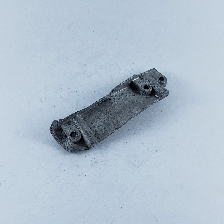

In [0]:
from google.colab.patches import cv2_imshow
print(trainY[2])
img = trainX[2]
cv2_imshow(img)

## Data Augmentation

In [0]:
'''
Sources:
(1) https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844
(2) https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show

def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    show()



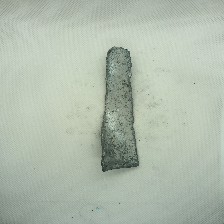

In [0]:
img = trainX_final_s[2]
cv2_imshow(img)

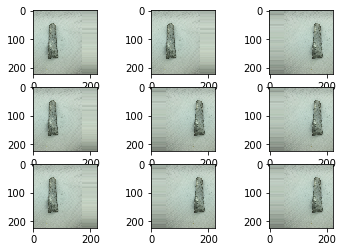

In [0]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
# img = load_img('bird.jpg')
# convert to numpy array
# img = trainX[2]
# data = img_to_array(img)
data = trainX_final_s[2]
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-50,50])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

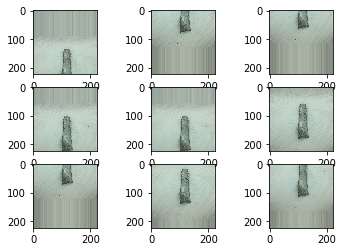

In [0]:
# example of vertical shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
data = trainX_final_s[2]
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

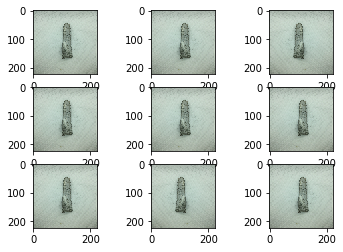

In [0]:
# example of horizontal flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
# load the image
data = trainX_final_s[2]
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

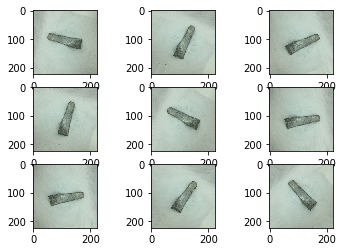

In [0]:
# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
data = trainX_final_s[2]
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

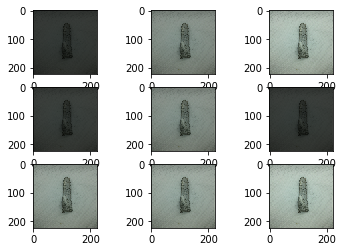

In [0]:
# example of brighting image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
data = trainX_final_s[2]
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

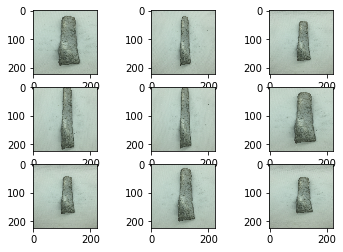

In [0]:
# example of zoom image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
data = trainX_final_s[2]
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [0]:
datagen = ImageDataGenerator()
it = datagen.flow(trainX_final_s, trainY_final_s)

## CIFAR 10 Model


---



### Augmented

In [0]:
'''
Sources: 
(1) https://keras.io/examples/cifar10_cnn/
(2) https://keras.io/examples/cifar10_resnet/
'''
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import os

batch_size = 32
num_classes = 5
epochs = 50
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_first_trained_metalid_model.h5'

# Convert class vectors to binary class matrices.
y_train_down = np.subtract(trainY_final_s,1)
y_test_down = np.subtract(testY_final, 1)
y_train = keras.utils.to_categorical(y_train_down, num_classes)
y_test = keras.utils.to_categorical(y_test_down, num_classes)
# y_train = keras.utils.to_categorical(trainY_final_s)
# y_test = keras.utils.to_categorical(testY_final)

# y_train = trainY_final_s
# y_test = testY_final

# define model
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',
                 input_shape=trainX_final_s.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))



# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)




# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255


Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(trainX_final_s, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(testX_final, y_test),
              shuffle=False) #Shuffled already (above)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=[-50,50],
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.5,
        shear_range=0.01,  # set range for random shear
        zoom_range=[0.5,1.0],  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        brightness_range=[0.2,1.0],
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format="channels_last",
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(trainX_final_s)

    # Fit the model on the batches generated by datagen.flow(). , steps_per_epoch =10 removed
    model.fit_generator(datagen.flow(trainX_final_s, y_train,
                                     batch_size=batch_size),
                        epochs=epochs, steps_per_epoch=len(trainX_final_s),
                        use_multiprocessing=True,
                        validation_data=(testX_final, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
# scores = model.evaluate(x_test, y_test, verbose=1)
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])

Using real-time data augmentation.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





702/702 [==============================] - 373s 531ms/step - loss: 11.0680 - acc: 0.3132 - val_loss: 11.0641 - val_acc: 0.3136
Epoch 2/50
702/702 [==============================] - 364s 518ms/step - loss: 11.0644 - acc: 0.3135 - val_loss: 11.0641 - val_acc: 0.3136
Epoch 3/50
267/702 [==========>...................] - ETA: 3:44 - loss: 11.0740 - acc: 0.3129

In [0]:
# Score trained model.
scores = model.evaluate(testX_final, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

236/236 [==============================] - 1s 3ms/step
Test loss: 12.020274550227798
Test accuracy: 0.2542372881355932


In [0]:
keras.utils.print_summary(model)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
activation_25 (Activation)   (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_26 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 111, 111, 64)     

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 00011: early stopping
Train: 0.255, Test: 0.254


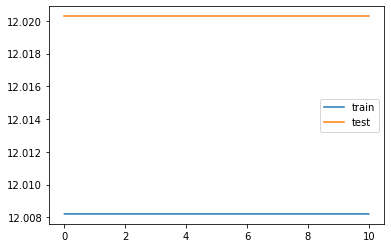

In [0]:
history = model.fit(trainX_final_s, y_train, validation_data=(testX_final, y_test), epochs=4000, verbose=0, callbacks=[es, mc])
saved_model = load_model('/content/saved_models/keras_first_trained_metalid_model.h5')

from matplotlib import pyplot
# evaluate the model
_, train_acc = model.evaluate(trainX_final_s, y_train, verbose=0)
_, test_acc = model.evaluate(testX_final, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

source: https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

It may show a flat line or noisy values of relatively high loss, indicating that the model was unable to learn the training dataset at all.

This is common when the model does not have a suitable capacity for the complexity of the dataset.

In [0]:
y_train[:10]

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [0]:
import pandas as pd
y = pd.DataFrame(y_test)
y.describe()


,0,1,2,3,4
count,236.000000,236.000000,236.000000,236.000000,236.000000
mean,0.105932,0.254237,0.067797,0.258475,0.313559
std,0.308404,0.436357,0.251931,0.438727,0.464925
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
from scipy import stats
stats.describe(y_test)

DescribeResult(nobs=236, minmax=(array([0., 0., 0., 0., 0.], dtype=float32), array([1., 1., 1., 1., 1.], dtype=float32)), mean=array([0.10593221, 0.2542373 , 0.06779661, 0.2584746 , 0.31355932],
      dtype=float32), variance=array([0.09511296, 0.1904074 , 0.0634694 , 0.19248159, 0.2161555 ],
      dtype=float32), skewness=array([2.5609937, 1.128824 , 3.4383924, 1.103362 , 0.8037298],
      dtype=float32), kurtosis=array([ 4.5585814 , -0.72575283,  9.822615  , -0.78259134, -1.354015  ],
      dtype=float32))

([array([211.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  25.]),
  array([176.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  60.]),
  array([220.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  16.]),
  array([175.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  61.]),
  array([162.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  74.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 5 Lists of Patches objects>)

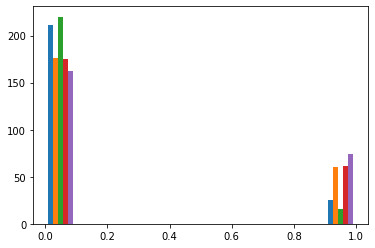

In [0]:
pyplot.hist(y_test)

([array([627.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  75.]),
  array([523.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 179.]),
  array([655.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  47.]),
  array([521.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 181.]),
  array([482.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 220.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 5 Lists of Patches objects>)

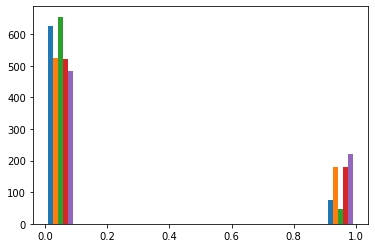

In [0]:
pyplot.hist(y_train)

In [0]:
print(y_test[:,0])
print(y_test[0,:])
print(y_test[:,1])
print(y_test[1,:])
print(y_test[:,2])
print(y_test[2,:])
print(y_test[:,3])
print(y_test[3,:])
print(y_test[:,4])
print(y_test[4,:])
stats.describe(y_test[:,0])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

DescribeResult(nobs=236, minmax=(0.0, 1.0), mean=0.105932206, variance=0.0951136, skewness=2.56095290184021, kurtosis=4.558480215742035)

In [0]:
from sklearn import metrics
y_pred = model.predict(testX_final)
print(y_pred)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [0]:
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)

[[25  0  0  0  0]
 [60  0  0  0  0]
 [16  0  0  0  0]
 [61  0  0  0  0]
 [74  0  0  0  0]]


In [0]:
# '''
# Sources:
# (1) https://gist.github.com/rragundez/ae3a17428bfec631d1b35dcdc6296a85
# NOT MULTILABEL - this is wrong. 
# '''

# print(__doc__)

# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn.metrics import multilabel_confusion_matrix
# from sklearn.utils.multiclass import unique_labels

# # import some data to play with
# # iris = datasets.load_iris()
# # X = iris.data
# # y = iris.target
# # class_names = iris.target_names

# # Split the data into a training set and a test set
# # X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # # Run classifier, using a model that is too regularized (C too low) to see
# # # the impact on the results
# # classifier = svm.SVC(kernel='linear', C=0.01)
# # y_pred = classifier.fit(X_train, y_train).predict(X_test)

# y_pred = model.predict(testX_final)
# class_names = ['ZN','SS','CU','BR', 'AL']

# def plot_confusion_matrix(y_true, y_pred, classes,
#                           normalize=False,
#                           title=None,
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if not title:
#         if normalize:
#             title = 'Normalized confusion matrix'
#         else:
#             title = 'Confusion matrix, without normalization'

#     # Compute confusion matrix
#     cm = multilabel_confusion_matrix(y_true, y_pred)
#     # Only use the labels that appear in the data
#     # classes = classes[unique_labels(y_true, y_pred)]
#     classes = ['ZN','SS','CU','BR', 'AL']
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     # fig, ax = plt.subplots()
#     # im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#     # ax.figure.colorbar(im, ax=ax)
#     # # We want to show all ticks...
#     # ax.set(xticks=np.arange(cm.shape[1]),
#     #        yticks=np.arange(cm.shape[0]),
#     #        # ... and label them with the respective list entries
#     #        xticklabels=classes, yticklabels=classes,
#     #        title=title,
#     #        ylabel='True label',
#     #        xlabel='Predicted label')

#     # # Rotate the tick labels and set their alignment.
#     # plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#     #          rotation_mode="anchor")

#     # # Loop over data dimensions and create text annotations.
#     # fmt = '.2f' if normalize else 'd'
#     # thresh = cm.max() / 2.
#     # for i in range(cm.shape[0]):
#     #     for j in range(cm.shape[1]):
#     #         ax.text(j, i, format(cm[i, j], fmt),
#     #                 ha="center", va="center",
#     #                 color="white" if cm[i, j] > thresh else "black")
#     # fig.tight_layout()
#     # return ax


# np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names,
#                       title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

# plt.show()


Sources: 
(1) https://keras.io/examples/cifar10_cnn/
(2) https://keras.io/examples/cifar10_resnet/

Confusion matrix, without normalization
[[[211   0]
  [ 25   0]]

 [[  0 176]
  [  0  60]]

 [[220   0]
  [ 16   0]]

 [[175   0]
  [ 61   0]]

 [[162   0]
  [ 74   0]]]
Normalized confusion matrix
[[[0.89  nan]
  [0.11  nan]]

 [[ nan 0.75]
  [ nan 0.25]]

 [[0.93  nan]
  [0.07  nan]]

 [[0.74  nan]
  [0.26  nan]]

 [[0.69  nan]
  [0.31  nan]]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


In [0]:
# def plot_multiclass_confusion_matrix(y_true, y_pred, label_to_class, save_plot=False):
#     fig, axes = plt.subplots(int(np.ceil(len(label_to_class) / 2)), 2, figsize=(15, 60))
#     axes = axes.flatten()
#     for i, conf_matrix in enumerate(multilabel_confusion_matrix(y_true, y_pred)):
#         tn, fp, fn, tp = conf_matrix.ravel()
#         f1 = 2 * tp / (2 * tp + fp + fn + sys.float_info.epsilon)
#         recall = tp / (tp + fn + sys.float_info.epsilon)
#         precision = tp / (tp + fp + sys.float_info.epsilon)
#         plot_confusion_matrix(
#             np.array([[tp, fn], [fp, tn]]),
#             classes=['+', '-'],
#             title=f'Label: {label_to_class[i]}\nf1={f1:.5f}\nrecall={recall:.5f}\nprecision={precision:.5f}',
#             ax=axes[i]
#         )
#         plt.tight_layout()
#     if save_plot:
#         plt.savefig('confusion_matrices.png', dpi=50)

### Non-Augmented

In [0]:
'''
Sources: 
(1) https://keras.io/examples/cifar10_cnn/
(2) https://keras.io/examples/cifar10_resnet/
'''
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import os

batch_size = 32
num_classes = 5
epochs = 50
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_first_trained_metalid_model_na.h5'

# Convert class vectors to binary class matrices.
y_train_down = np.subtract(trainY_final_s,1)
y_test_down = np.subtract(testY_final, 1)
y_train = keras.utils.to_categorical(y_train_down, num_classes)
y_test = keras.utils.to_categorical(y_test_down, num_classes)
# y_train = keras.utils.to_categorical(trainY_final_s)
# y_test = keras.utils.to_categorical(testY_final)

# y_train = trainY_final_s
# y_test = testY_final

# define model
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',
                 input_shape=trainX_final_s.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))



# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)




# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255


In [0]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(trainX_final_s, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(testX_final, y_test),
              shuffle=False) #shuffled already above
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(trainX_final_s)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(trainX_final_s, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(testX_final, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
# scores = model.evaluate(x_test, y_test, verbose=1)
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])

Not using data augmentation.
Train on 702 samples, validate on 236 samples
Epoch 1/50
702/702 [==============================] - 9s 13ms/step - loss: 11.6557 - acc: 0.2735 - val_loss: 11.0641 - val_acc: 0.3136
Epoch 2/50
702/702 [==============================] - 8s 11ms/step - loss: 11.0668 - acc: 0.3134 - val_loss: 11.0641 - val_acc: 0.3136
Epoch 3/50
702/702 [==============================] - 8s 11ms/step - loss: 11.0668 - acc: 0.3134 - val_loss: 11.0641 - val_acc: 0.3136
Epoch 4/50
702/702 [==============================] - 8s 11ms/step - loss: 11.0668 - acc: 0.3134 - val_loss: 11.0641 - val_acc: 0.3136
Epoch 5/50
702/702 [==============================] - 8s 11ms/step - loss: 11.0668 - acc: 0.3134 - val_loss: 11.0641 - val_acc: 0.3136
Epoch 6/50
702/702 [==============================] - 8s 11ms/step - loss: 11.1128 - acc: 0.3105 - val_loss: 11.0641 - val_acc: 0.3136
Epoch 7/50
702/702 [==============================] - 8s 11ms/step - loss: 11.0668 - acc: 0.3134 - val_loss: 11.064

In [0]:
# Score trained model.
scores = model.evaluate(testX_final, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

236/236 [==============================] - 1s 3ms/step
Test loss: 11.064116354716028
Test accuracy: 0.3135593220338983


In [0]:
keras.utils.print_summary(model)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
activation_7 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_8 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 111, 111, 64)     

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 00011: early stopping
Train: 0.313, Test: 0.314


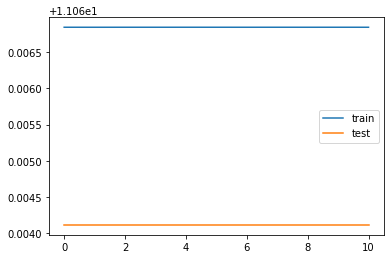

In [0]:
history = model.fit(trainX_final_s, y_train, validation_data=(testX_final, y_test), epochs=4000, verbose=0, callbacks=[es, mc])
saved_model = load_model('/content/saved_models/keras_first_trained_metalid_model_na.h5')

from matplotlib import pyplot
# evaluate the model
_, train_acc = model.evaluate(trainX_final_s, y_train, verbose=0)
_, test_acc = model.evaluate(testX_final, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

## ResNet


---



### Augmented

In [0]:
# trainX_final = np.vstack([trainX, trainXa])
# print(trainX_final.shape)
# trainY_final = np.concatenate([trainY, trainYa])
# print(trainY_final.shape)
# testX_final = np.vstack([testX, testXa])
# print(testX_final.shape)
# testY_final = np.concatenate([testY, testYa])
# print(testY_final.shape)
# valX_final = np.vstack([valX, valXa])
# print(valX_final.shape)
# valY_final = np.concatenate([valY, valYa])
# print(valY_final.shape)
# #Shuffle Training Set
# trainX_final_s, trainY_final_s = shuffle(trainX_final, trainY_final, random_state=Seed)
# print(trainX_final_s.shape)
# print(trainY_final_s.shape)

In [0]:
'''
Sources:
(1) https://keras.io/examples/cifar10_resnet/
'''


from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
# from keras.datasets import cifar10
import numpy as np
import os

# Training parameters
batch_size = 32  # orig paper trained all networks with batch_size=128
epochs = 200
data_augmentation = True
num_classes = 5

# Subtracting pixel mean improves accuracy
subtract_pixel_mean = True

# Model parameter
# ----------------------------------------------------------------------------
#           |      | 200-epoch | Orig Paper| 200-epoch | Orig Paper| sec/epoch
# Model     |  n   | ResNet v1 | ResNet v1 | ResNet v2 | ResNet v2 | GTX1080Ti
#           |v1(v2)| %Accuracy | %Accuracy | %Accuracy | %Accuracy | v1 (v2)
# ----------------------------------------------------------------------------
# ResNet20  | 3 (2)| 92.16     | 91.25     | -----     | -----     | 35 (---)
# ResNet32  | 5(NA)| 92.46     | 92.49     | NA        | NA        | 50 ( NA)
# ResNet44  | 7(NA)| 92.50     | 92.83     | NA        | NA        | 70 ( NA)
# ResNet56  | 9 (6)| 92.71     | 93.03     | 93.01     | NA        | 90 (100)
# ResNet110 |18(12)| 92.65     | 93.39+-.16| 93.15     | 93.63     | 165(180)
# ResNet164 |27(18)| -----     | 94.07     | -----     | 94.54     | ---(---)
# ResNet1001| (111)| -----     | 92.39     | -----     | 95.08+-.14| ---(---)
# ---------------------------------------------------------------------------
n = 3

# Model version
# Orig paper: version = 1 (ResNet v1), Improved ResNet: version = 2 (ResNet v2)
version = 1

# Computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)

# Load the CIFAR10 data.
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()


# Input image dimensions.
input_shape = trainX_final_s.shape[1:]

# Normalize data.
# x_train = x_train.astype('float32') / 255
# x_test = x_test.astype('float32') / 255

# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(trainX_final_s, axis=0)
    trainX_final_s = trainX_final_s - x_train_mean
    testX_final = testX_final - x_train_mean
    # x_train_mean = np.mean(x_train, axis=0)
    # x_train -= x_train_mean
    # x_test -= x_train_mean

print('x_train shape:', trainX_final_s.shape)
print(trainX_final_s.shape[0], 'train samples')
print(testX_final.shape[0], 'test samples')
print('y_train shape:', trainY_final_s.shape)
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')
# print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train_down = np.subtract(trainY_final_s,1)
y_test_down = np.subtract(testY_final, 1)
y_train = keras.utils.to_categorical(y_train_down, num_classes)
y_test = keras.utils.to_categorical(y_test_down, num_classes)
# y_train_down = np.subtract(trainY_final_s,1)
# y_test_down = np.subtract(testY_final, 1)
# y_train = keras.utils.to_categorical(y_train_down, num_classes)
# y_test = keras.utils.to_categorical(y_test_down, num_classes)


def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=5):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model


def resnet_v2(input_shape, depth, num_classes=5):
    """ResNet Version 2 Model builder [b]

    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as
    bottleneck layer
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number filters and the
    same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # Instantiate the stack of residual units
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2    # downsample

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model


if version == 2:
    model = resnet_v2(input_shape=input_shape, depth=depth) #ERROR - no numclass passed
else:
    model = resnet_v1(input_shape=input_shape, depth=depth) #ERROR - no numclass passed

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()
print(model_type)

# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(trainX_final_s, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(testX_final, y_test),
              shuffle=False, #WAS TRUE
              callbacks=callbacks)

    # model.fit(x_train, y_train,
    #           batch_size=batch_size,
    #           epochs=epochs,
    #           validation_data=(x_test, y_test),
    #           shuffle=True,
    #           callbacks=callbacks)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(trainX_final_s)
    # datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(trainX_final_s, y_train, batch_size=batch_size),
                        validation_data=(testX_final, y_test),
                        epochs=epochs, verbose=1, workers=4,
                        callbacks=callbacks)

# Score trained model.
scores = model.evaluate(testX_final, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (702, 224, 224, 3)
702 train samples
236 test samples
y_train shape: (702,)
Learning rate:  0.001
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 224, 224, 16) 448         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_58 (BatchNo (None, 224, 224, 16) 64          conv2d_64[0][0]                  
__________________________________________________________________________________________________
activation_58 (Activation)      (None, 224, 224, 16) 0           batch_normali

In [0]:
# Score trained model.
scores = model.evaluate(testX_final, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

236/236 [==============================] - 2s 8ms/step
Test loss: 0.42753492952403377
Test accuracy: 0.9194915254237288


In [0]:
x_train_mean = np.mean(trainX_final_s, axis=0)



In [0]:
np.save('x_train_mean', x_train_mean)